# Tests

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_openml

df = fetch_openml('house_prices', as_frame=True).frame
# fetch_openml("adult", version=2) 
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
target_col = 'SalePrice'

col = 'MSSubClass'

te_df = df.copy()

agg_list = ['mean', 'median', 'max', 'min']
group_df = te_df.groupby(col)[target_col].agg(agg_list).reset_index()
group_df.columns = [col] + [f'{col}_te_{name}' for name in agg_list]

group_df

,MSSubClass,MSSubClass_te_mean,MSSubClass_te_median,MSSubClass_te_max,MSSubClass_te_min
0,20,185224.811567,159250.0,611657,35311
1,30,95829.724638,99900.0,163500,34900
2,40,156125.000000,142500.0,260000,79500
3,45,108591.666667,107500.0,139400,76000
4,50,143302.972222,132000.0,410000,37900
5,60,239948.501672,215200.0,755000,129000
6,70,166772.416667,156000.0,359100,40000
7,75,192437.500000,163500.0,475000,101000
8,80,169736.551724,166500.0,345000,107000
9,85,147810.000000,140750.0,198500,123000


In [16]:
pd.merge(te_df, group_df, on=col)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_te_mean,MSSubClass_te_median,MSSubClass_te_max,MSSubClass_te_min
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,239948.501672,215200.0,755000,129000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,185224.811567,159250.0,611657,35311
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,239948.501672,215200.0,755000,129000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,166772.416667,156000.0,359100,40000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,239948.501672,215200.0,755000,129000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,175000,239948.501672,215200.0,755000,129000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,210000,185224.811567,159250.0,611657,35311
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2500,5,2010,WD,Normal,266500,166772.416667,156000.0,359100,40000
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,142125,185224.811567,159250.0,611657,35311


In [18]:
bool([])

False

# Functions

In [ ]:
def handle_data(df, dt_col=None, log_cols=[]):
  df = df.copy()
  
  cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
  
  if dt_col:
    df[dt_col] = pd.to_datetime(df[dt_col])
  
  df[cat_cols] = df[cat_cols].fillna('Nan')
  
  # Ensure dtype is category for LGBM
  df[cat_cols] = df[cat_cols].astype('category')
  
  df[log_cols] = np.log1p(df[log_cols])

In [ ]:
def expand_date(df, dt_col='date_time'):
  df = df.copy()
  if dt_col not in df.columns: ValueError(f'Column: {dt_col} is not found in df')
  
  if not pd.api.types.is_datetime64_any_dtype(df[dt_col]):
    warnings.warn(f'Column: {dt_col} is not a datetime type, automatically converting datetime')
    df[dt_col] = pd.to_datetime(df[dt_col])
  
  df['_year'] = df[dt_col].dt.year
  df['_month'] = df[dt_col].dt.month
  df['_day'] = df[dt_col].dt.day
  df['_weekday'] = df[dt_col].dt.weekday
  df['is_weekend'] = (df[dt_col].dt.weekday) > 4
  df['_week_of_year'] = df[dt_col].dt.isocalendar().week

In [33]:
model = train_model(model_type='lightgbm', task='regression', dataset=df, early_stop=1000, target='target', params={
	'iterations': 1000,
	'learning_rate': 1e-2,
	'loss_function': 'RMSE',
	'device': 'CPU',
	'depth': 4,
})

/home/mashrur/anaconda3/envs/my_env/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 0.768102	valid_1's rmse: 0.786397
[200]	training's rmse: 0.638532	valid_1's rmse: 0.652577
[300]	training's rmse: 0.576595	valid_1's rmse: 0.590377
[400]	training's rmse: 0.537867	valid_1's rmse: 0.552249
[500]	training's rmse: 0.517474	valid_1's rmse: 0.532775
[600]	training's rmse: 0.502465	valid_1's rmse: 0.519764
[700]	training's rmse: 0.492522	valid_1's rmse: 0.511498
[800]	training's rmse: 0.483499	valid_1's rmse: 0.504518
[900]	training's rmse: 0.476271	valid_1's rmse: 0.499565
[1000]	training's rmse: 0.469575	valid_1's rmse: 0.495326
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.469575	valid_1's rmse: 0.495326


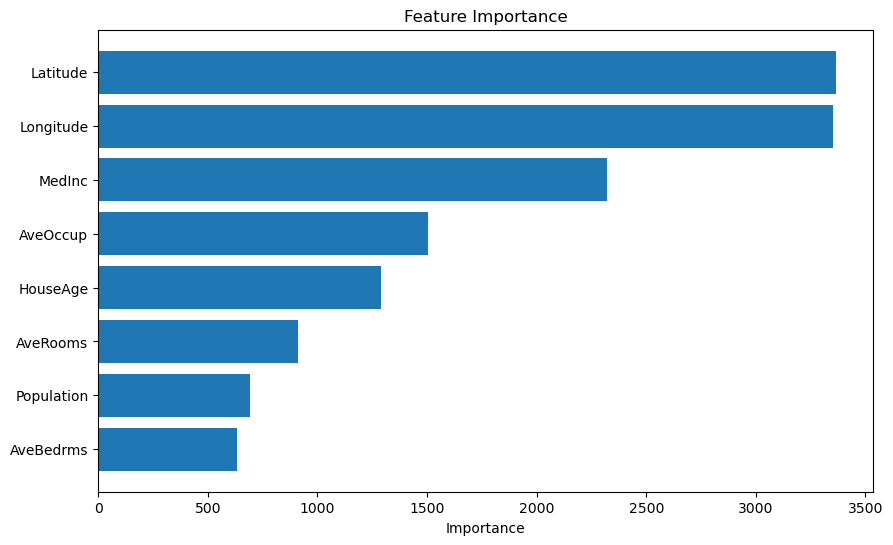

In [34]:
model.plot_importance()

In [35]:
model.predict(df.drop(columns=['target']))

array([4.27068135, 3.88838186, 4.14659996, ..., 0.78112146, 0.8573314 ,
       0.97145726])